In [36]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as plot
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from bioinfokit.visuz import cluster
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import manifold
from time import time
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [3]:
df = pan.read_csv('Hitters.csv')
df.head()
# I think standardizing the data before clustering is a good idea because you dont want the hierachy to be biased
# I would use metric-based distance to cluster the data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
# Check for null values
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [5]:
# Drop any rows the contain missing values
# Drop Salary
df = df.dropna(axis=0)
# Check again for null values
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [10]:
# tree methods in sklearn library only allow for numerical features
features = df[['League', 'Division', 'NewLeague']]
print(features)
onehot_encoder = OneHotEncoder(drop = "first")
dummies = onehot_encoder.fit_transform(features).toarray()

    League Division NewLeague
1        N        W         N
2        A        W         A
3        N        E         N
4        N        E         N
5        A        W         A
..     ...      ...       ...
317      N        E         N
318      A        E         A
319      A        W         A
320      A        E         A
321      A        W         A

[263 rows x 3 columns]


In [11]:
dummies = pan.DataFrame(dummies, columns = onehot_encoder.get_feature_names_out())
dummies.head()

,League_N,Division_W,NewLeague_N
0,1.0,1.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,0.0,1.0,0.0


In [42]:
# Get dummy variables
dummies = pan.get_dummies(df[['League', 'Division', 'NewLeague']])
# Extract independent variable
y = df['Salary']
# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X = df.drop(['Salary', 'NewLeague', 'League', 'Division'], axis=1)
# Define the feature set X.
X = pan.concat([X, dummies], axis=1).values

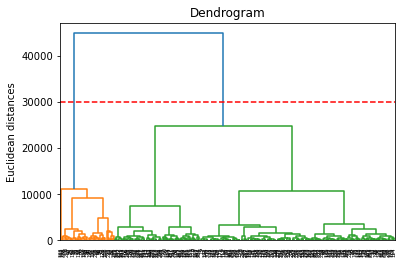

In [47]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plot.title('Dendrogram')
plot.ylabel('Euclidean distances')
plot.axhline(y=30000, color='r', linestyle='--')
plot.show()

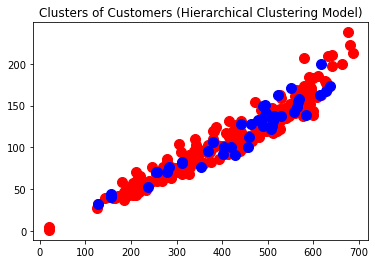

In [49]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(X)
plot.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plot.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plot.title('Clusters of Customers (Hierarchical Clustering Model)')
plot.show()

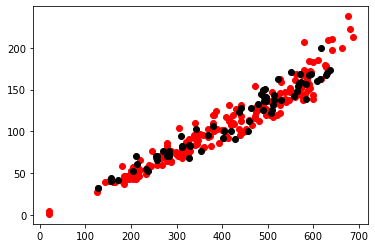

In [65]:
kmeans = KMeans(n_clusters=2)
#predict the labels of clusters.
label = kmeans.fit_predict(X)
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
 
#Plotting the results
plot.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plot.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
plot.show()

In [ ]:
# I recommend the K-means method of clustering